In [83]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [114]:
import numpy as np
import pandas as pd
 
import seaborn as sns
from sqlalchemy.sql import label

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# engine = create_engine(f"sqlite:///{database_path}")

In [27]:
df_station=pd.read_sql("SELECT * FROM station", engine)
df_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [28]:
df_measurement=pd.read_sql("SELECT * FROM measurement", engine)
df_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [22]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
recent_date=session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23')

In [42]:
type(recent_date)

sqlalchemy.util._collections.result

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
change=dt.timedelta(days=365)
change

datetime.timedelta(days=365)

In [52]:
# Calculate the date one year from the last date in data set.
# last_year=session.query(measurement.date == func.max(measurement.date) - 'dt.timedelta(days=365)').first()
# last_year
last_year =dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [190]:
# Perform a query to retrieve the data and precipitation scores
prcp= session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).order_by(measurement.date).all()
prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [191]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(prcp)
plot_df=prcp_df.set_index('date')
# Sort the dataframe by date

plot_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


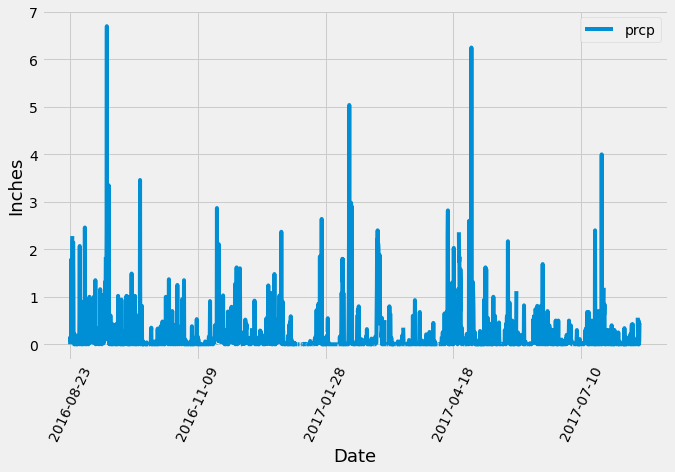

In [192]:
# Use Pandas Plotting with Matplotlib to plot the data
plot_df.plot(figsize=(10,6))
plt.xticks(rotation=65,fontsize=14)
plt.ylabel('Inches',fontsize=18)
plt.xlabel('Date' ,fontsize=18)
plt.show()

In [193]:
# Use Pandas to calcualte the summary statistics for the precipitation data -look at the pictures
plot_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [209]:
# Design a query to calculate the total number stations in the dataset


In [176]:
unique_stations=session.query(measurement.station).group_by(measurement.station).count()
unique_stations

9

In [213]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [214]:

active_df=pd.DataFrame(active_stations)

ValueError: 1 columns passed, passed data had 2 columns

In [189]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most_active=session.query(measurement.station== 'USC00519281').first()
# most_active
temp = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
temp_all=session.query(*temp).filter(measurement.station=='USC00519281').all()
temp_all

[(54.0, 85.0, 71.66378066378067)]

In [198]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
    temp_data=session.query(measurement.tobs).filter(measurement.station=='USC00519281').\
    filter(measurement.date>=last_year).order_by(measurement.date.desc()).all()

temp_data_df=pd.DataFrame(temp_data)
temp_data_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


Text(0.5, 1.0, 'Station Analysis (8/24/16 to 8/23/17)')

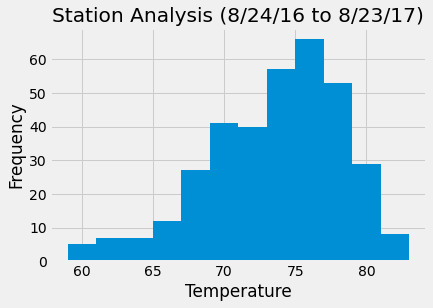

In [208]:
plt.hist(temp_data_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/24/16 to 8/23/17)")

# Close session

In [ ]:
# Close Session
session.close()